# Objet

Répétition du cours N° 16 - [SCIPY PYTHON Tutoriel - Optimize, Fourier, NdImage (16/30)](https://www.youtube.com/watch?v=P0Xr5TIML8U&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq)

## 16/30 SciPy

https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide

* Special functions (scipy.special)
* Integration (scipy.integrate)
* Optimization (scipy.optimize)
* Interpolation (scipy.interpolate)
* Fourier Transforms (scipy.fft)
* Signal Processing (scipy.signal)
* Linear Algebra (scipy.linalg)
* Sparse eigenvalue problems with ARPACK
* Compressed Sparse Graph Routines (scipy.sparse.csgraph)
* Spatial data structures and algorithms (scipy.spatial)
* Statistics (scipy.stats)
* Multidimensional image processing (scipy.ndimage)
* File IO (scipy.io)

### Interpolation

https://docs.scipy.org/doc/scipy/tutorial/interpolate.html

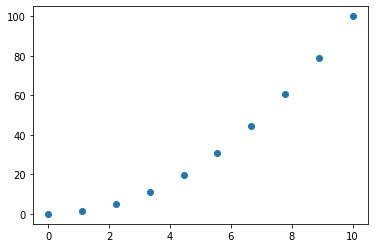

In [ ]:
# cas du dataset auquel il manque des valeurs intermédiaires : capteur à fréquence lente
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 10)
y = x**2
plt.scatter(x, y)


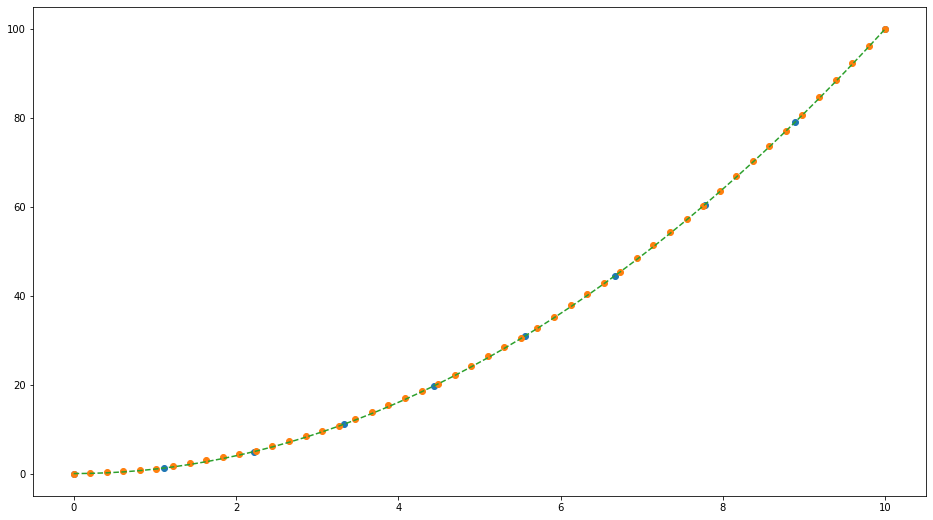

In [ ]:
from scipy.interpolate import interp1d
f1 = interp1d(x, y, kind='linear')
f2 = interp1d(x, y, kind='cubic')
x_new = np.linspace(0, 10, 50)
plt.figure(figsize=(16, 9))
plt.plot(x, y, 'o', x_new, f1(x_new), 'o', x_new, f2(x_new), '--')

### Optimisation

https://docs.scipy.org/doc/scipy/tutorial/optimize.html

Ce qui est fait ici est +tôt à faire avec ScikitLearn.

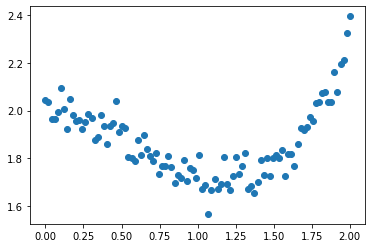

In [ ]:
x = np.linspace(0, 2, 100)
y = 1/3 * x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)

[ 0.34508101 -0.59960282 -0.03524637  2.01032859]


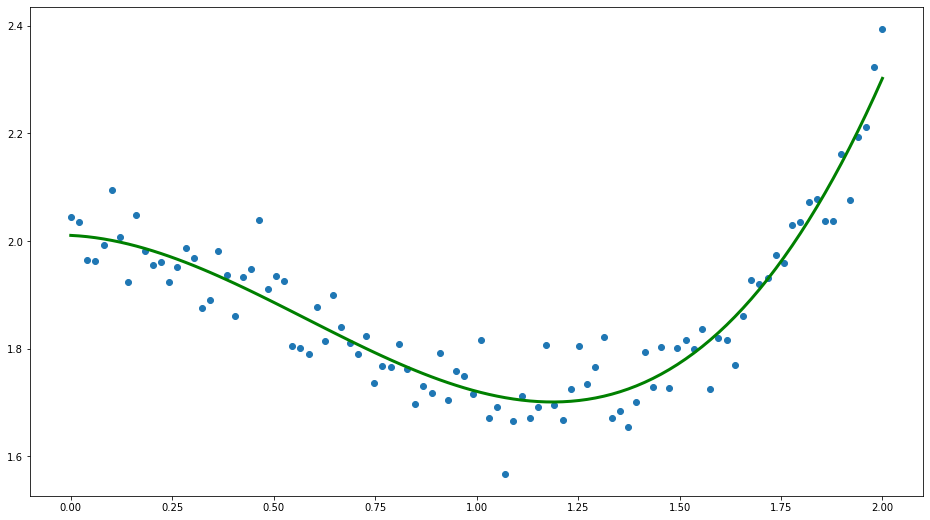

In [ ]:
from scipy import optimize

def f(x, a, b, c, d):
  return a * x**3 + b * x**2 + c * x + d

pars, cov_pars = optimize.curve_fit(f, x, y)
print(pars)
plt.figure(figsize=(16, 9))
plt.scatter(x, y)
plt.plot(x, f(x, *pars), c='g', lw=3)

### Recherche de minimum

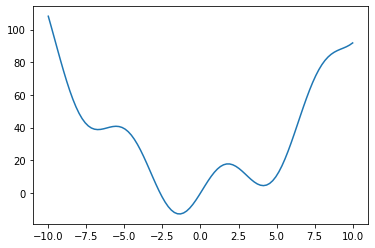

In [ ]:
def f(x):
  return x**2 + 15 * np.sin(x)

x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

      fun: 38.81120617595851
 hess_inv: array([[0.11637184]])
      jac: array([4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([-6.73789948])


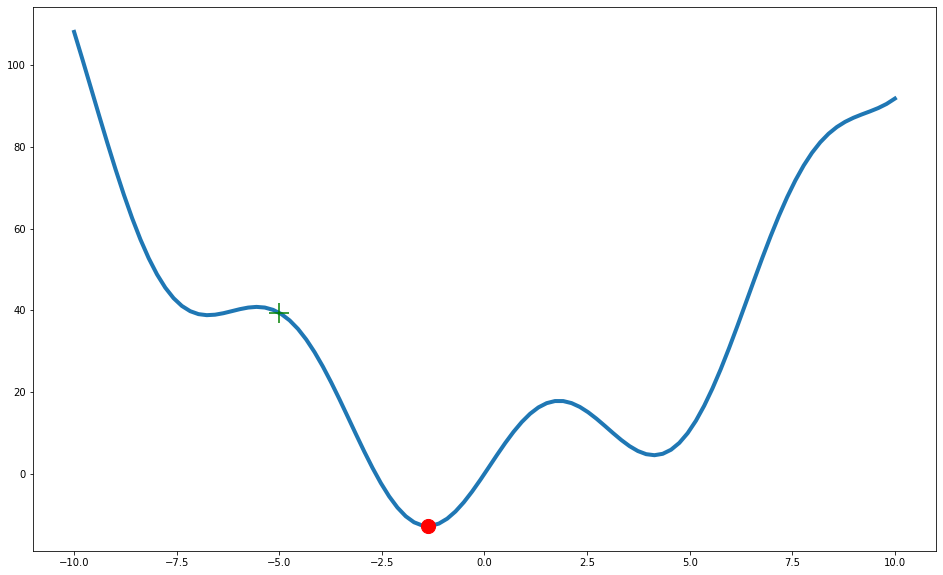

In [ ]:
print(optimize.minimize(f, x0=-8))
x_min = optimize.minimize(f, x0=-5).x
x0 = -5
plt.figure(figsize=(16.18, 10))
plt.plot(x, f(x), lw=4, zorder=-1)
plt.scatter(x0, f(x0), s=400, marker='+', c='g', zorder=1)
plt.scatter(x_min, f(x_min), s=200, c='r', zorder=1)


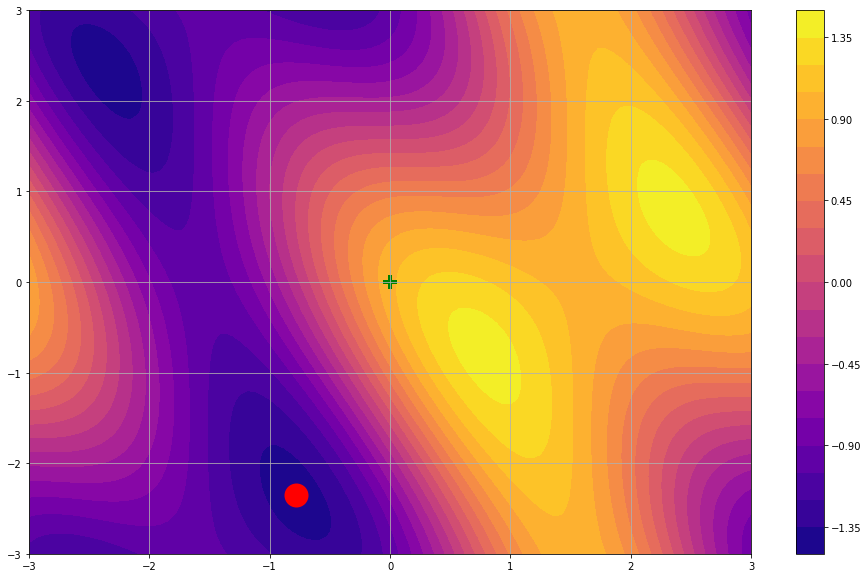

In [ ]:
def f(x):
  return np.sin(x[0]) + np.cos(x[0] + x[1]) * np.cos(x[0])

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)
plt.figure(figsize=(16.18, 10))
plt.grid(True)
plt.contourf(x, y, f(np.array([x, y])), 20, cmap='plasma')
plt.colorbar()

x0 = np.zeros((2, 1))
plt.scatter(x0[0], x0[1], marker='+', c='g', s=200, lw=4)

x_min = optimize.minimize(f, x0=x0).x
plt.scatter(x_min[0], x_min[1], c='r', s=400, lw=4)

### Traitement du signal, et en part. transformée de Fourier

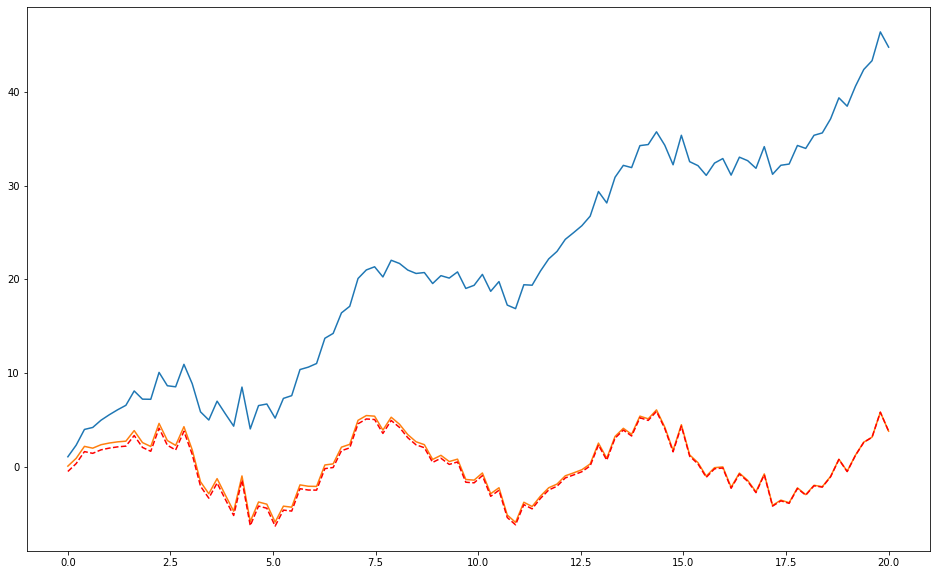

In [ ]:
# supprimer toute tendance linéaire dans un signal : detrend
x = np.linspace(0, 20, 100)
y_ = 4*np.sin(x) + np.random.randn(x.shape[0])
y = 1 + 2*x + y_
plt.figure(figsize=(16.18, 10))
plt.plot(x, y, x, y_)
from scipy import signal
_y = signal.detrend(y)
plt.plot(x, _y, '--', c='r')


#### Transformée de Fourier (fondamental)



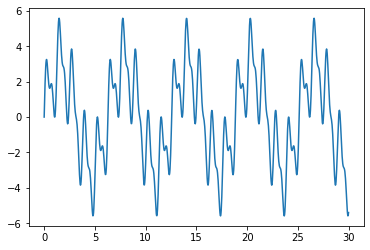

In [ ]:
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x)
plt.plot(x, y)

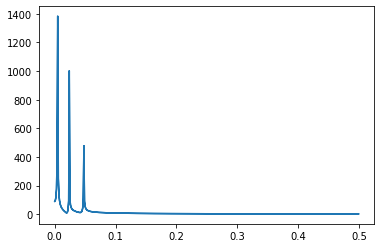

In [ ]:
from scipy import fftpack
power = fftpack.fft(y)
freq = fftpack.fftfreq(y.size)
plt.figure
plt.plot(np.abs(freq), np.abs(power))

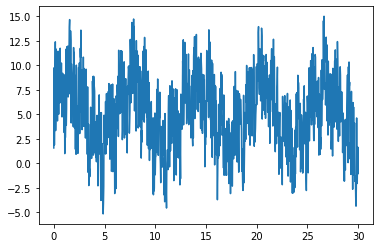

In [ ]:
# opération inverse : signal bruité -> FT -> lissage -> FT inverse
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x, y)


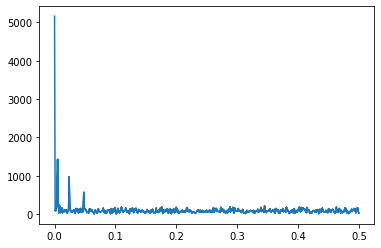

In [ ]:
from scipy import fftpack
power = fftpack.fft(y)
freq = fftpack.fftfreq(y.size)
# plt.figure(figsize=(16.18, 10))
plt.plot(np.abs(freq), np.abs(power))

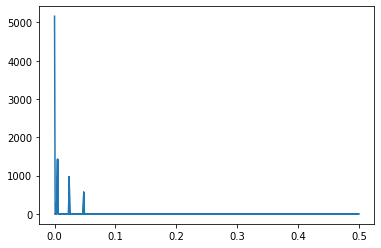

In [ ]:
power[np.abs(power) < 400] = 0
plt.plot(np.abs(freq), np.abs(power))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


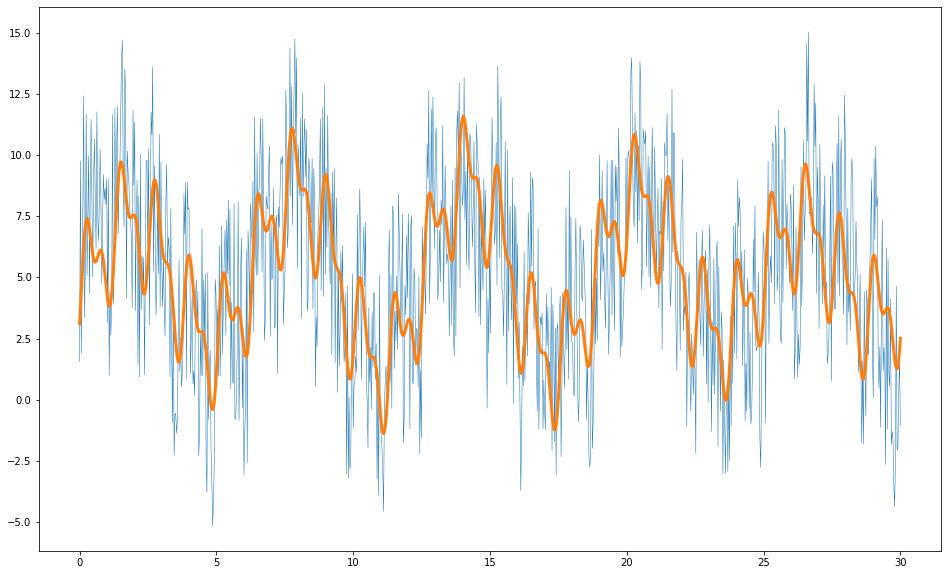

In [ ]:
y_clean = fftpack.ifft(power)
plt.figure(figsize=(16.18, 10))
plt.plot(x, y, lw=0.5)
plt.plot(x, y_clean, lw=3)

### Traitement d'images : morphologie

Je le fais avec des feuilles mortes.

C'est proprement génial.

In [ ]:
# connect to GDrive
from google.colab import drive
# drive.mount('/content/drive')

img_path = '/content/drive/My Drive/Colab Notebooks/Franck | Training | Machine Learnia/feuilles_mortes.jpg'
image = plt.imread(img_path)
print(image.shape)
plt.figure(figsize=(16.18, 10))
plt.imshow(image)
plt.show()
image = image[:, :, 0]
plt.figure(figsize=(16.18, 10))
plt.imshow(image, cmap='gray')
plt.show()

NameError: ignored

In [ ]:
# histogramme des niveaux de gris
plt.hist(np.copy(image).ravel(), bins=255)
plt.show()

In [ ]:
# image = image > 175
plt.figure(figsize=(16.18, 10))
plt.imshow(image)

In [ ]:
# nettoyage des artefacts
from scipy import ndimage
open_x = ndimage.binary_opening(image)
plt.figure(figsize=(16.18, 10))
plt.imshow(open_x)

In [ ]:
label_image, n_labels = ndimage.label(open_x)
print(n_labels)
plt.figure(figsize=(16.18, 10))
plt.imshow(label_image)

In [ ]:
# comptage des pixels pour chaque individu

sizes = ndimage.sum(open_x, label_image, range(n_labels))
plt.scatter(range(n_labels), sizes, c='orange')